# Deep Learning Project.
# "Brain Tumor Detection" 


Preprocessing your dataset is a crucial step for training an effective Deep Learning model for brain tumor detection. Here’s a general workflow you can follow:


# 1. Data Collection
Ensure you have a sufficient amount of labeled brain MRI images. Common datasets include:

BRATS (Brain Tumor Segmentation): Available through the Medical Decathlon or the BRATS challenges.
Kaggle Datasets: Various MRI datasets available on Kaggle. https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# DENSE NET Model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np

Training images shape: (1100, 224, 224, 3)
Training labels shape: (1100,)
Validation images shape: (1100, 224, 224, 3)
Validation labels shape: (1100,)
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,300,418 (27.85 MB)

 Trainable params: 7,216,770 (27.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/10


c:\Users\Saif Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 976s 26s/step - accuracy: 0.6955 - loss: 0.5570 - val_accuracy: 0.8427 - val_loss: 0.3812 - learning_rate: 1.0000e-04
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 816s 23s/step - accuracy: 0.9463 - loss: 0.1315 - val_accuracy: 0.9073 - val_loss: 0.2192 - learning_rate: 1.0000e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 811s 23s/step - accuracy: 0.9642 - loss: 0.0812 - val_accuracy: 0.9100 - val_loss: 0.1959 - learning_rate: 1.0000e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 812s 23s/step - accuracy: 0.9865 - loss: 0.0544 - val_accuracy: 0.9500 - val_loss: 0.1319 - learning_rate: 1.0000e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 811s 23s/step - accuracy: 0.9847 - loss: 0.0444 - val_accuracy: 0.9582 - val_loss: 0.1232 - learning_rate: 1.0000e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 815s 23s/step - accuracy: 0.9825 - loss: 0.0584 - val_accuracy: 0.9382 - val_loss: 0.1611 - learning_rate: 1.0000e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 820s 23s/step - accuracy: 0.9881 - lo

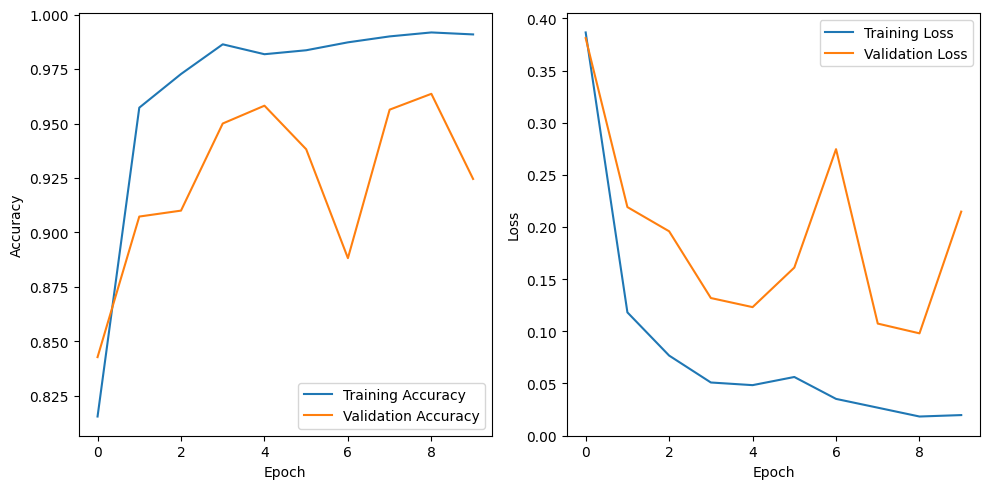

35/35 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       550
           1       1.00      0.85      0.92       550

    accuracy                           0.92      1100
   macro avg       0.93      0.92      0.92      1100
weighted avg       0.93      0.92      0.92      1100



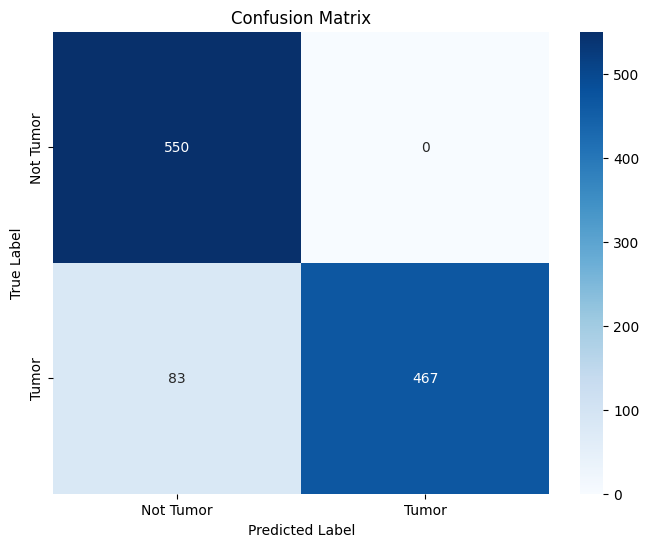

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import numpy as np

# Define input shape (assuming 224x224 RGB images)
input_shape = (224, 224, 3)
num_classes = 2

# Function to load and preprocess images
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label, category in enumerate(['Not Tumor', 'Tumor']):
        label_path = os.path.join(folder_path, category)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))  # Resize image to 224x224 pixels
                img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess training/validation data
data_dir = 'Brain Tumor Data Set/'
train_images, train_labels = load_images_from_folder(os.path.join(data_dir, 'train'))
val_images, val_labels = load_images_from_folder(os.path.join(data_dir, 'validation'))

# Print shapes of loaded datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

# Define data generators for training and validation with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # Change 2: Removed rescale=1./255 since images are already normalized

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow(val_images, val_labels, batch_size=32)

# Build the model using Functional API
inputs = Input(shape=input_shape)
base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=inputs)

# Fine-tune DenseNet121 - Unfreeze some layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Display model summary
model.summary()

# Compute class weights and convert to dictionary
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))

# Define learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(train_generator,
                    epochs=10,  # Increase epochs if needed
                    validation_data=val_generator,
                    class_weight=class_weights_dict,
                    callbacks=[reduce_lr])

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator, verbose=2)
print("\nValidation Accuracy:", val_acc)

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions
predictions = model.predict(val_images)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(val_labels, predicted_labels))

# Plot confusion matrix
cm = confusion_matrix(val_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Tumor', 'Tumor'], yticklabels=['Not Tumor', 'Tumor'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the model in H5 format
model.save('DenseNet1_Model_brain_tumor_detection.h5')
